# Hypotheses 7: The Proportion of Positive Emotions in User Reviews is Positively Correlated with Box Office Revenue.

Data before handling missing values:
   movie_id  worldwide_box_office  avg_posemo
0     18803           197618160.0    4.260000
1     31297                   NaN   12.436667
2     34261                   NaN    8.136667
3     31789                   NaN    4.730000
4     33957                   NaN    5.788333
Missing values after handling:
movie_id                0
worldwide_box_office    0
avg_posemo              0
dtype: int64
   movie_id  worldwide_box_office  avg_posemo
0     18803           197618160.0    4.260000
1     31297                   0.0   12.436667
2     34261                   0.0    8.136667
3     31789                   0.0    4.730000
4     33957                   0.0    5.788333
Correlation between Average Positive Emotion (posemo) and Worldwide Box Office: 0.0184252785761474


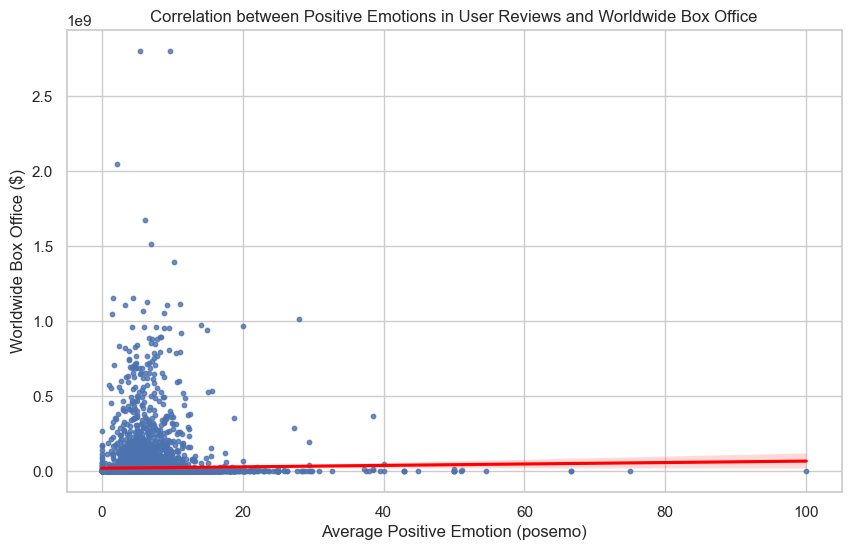

In [7]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def load_config():
    return {
        'dbname': 'postgres',
        'user': 'postgres',
        'password': 'Laiba786',
        'host': 'localhost',
        'port': '5432'
    }

def get_posemo_boxoffice_data():
    config = load_config()
    try:
        with psycopg2.connect(**config) as conn:
            with conn.cursor() as cur:
                query = """
                SELECT 
                    movie_table.movie_id,
                    movie_table.worldwideboxoffice,
                    AVG(user_reviews.posemo) AS avg_posemo
                FROM movie_table
                JOIN user_reviews ON movie_table.movie_id = user_reviews.movie_id
                WHERE user_reviews.posemo IS NOT NULL
                GROUP BY movie_table.movie_id;
                """
                cur.execute(query)
                
                rows = cur.fetchall()
                df_posemo_boxoffice = pd.DataFrame(rows, columns=['movie_id', 'worldwide_box_office', 'avg_posemo'])

                print("Data before handling missing values:")
                print(df_posemo_boxoffice.head())

                df_posemo_boxoffice['worldwide_box_office'] = df_posemo_boxoffice['worldwide_box_office'].fillna(0)

                print("Missing values after handling:")
                print(df_posemo_boxoffice.isna().sum())

                return df_posemo_boxoffice

    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        return None

def calculate_posemo_correlation(df_posemo_boxoffice):
    correlation = df_posemo_boxoffice['worldwide_box_office'].corr(df_posemo_boxoffice['avg_posemo'])
    print(f"Correlation between Average Positive Emotion (posemo) and Worldwide Box Office: {correlation}")
    return correlation

def plot_posemo_correlation(df_posemo_boxoffice):
    sns.set(style="whitegrid")
    
    plt.figure(figsize=(10, 6))
    sns.regplot(x='avg_posemo', y='worldwide_box_office', data=df_posemo_boxoffice, scatter_kws={'s': 10}, line_kws={"color":"red"})
    
    plt.title('Correlation between Positive Emotions in User Reviews and Worldwide Box Office')
    plt.xlabel('Average Positive Emotion (posemo)')
    plt.ylabel('Worldwide Box Office ($)')
    
    plt.show()

if __name__ == '__main__':
    df_posemo_boxoffice = get_posemo_boxoffice_data()
    if df_posemo_boxoffice is not None:
        print(df_posemo_boxoffice.head())
        
        correlation = calculate_posemo_correlation(df_posemo_boxoffice)
        
        plot_posemo_correlation(df_posemo_boxoffice)


# Hypothesis 8: The negative emotion from the users is negatively correlated with the sales of movies.

Data before handling missing values:
   movie_id  worldwide_box_office  avg_negemo
0     18803           197618160.0    2.130000
1     31297                   NaN    4.043333
2     34261                   NaN    1.390000
3     31789                   NaN    1.836667
4     33957                   NaN    3.222000
Missing values after handling:
movie_id                0
worldwide_box_office    0
avg_negemo              0
dtype: int64
   movie_id  worldwide_box_office  avg_negemo
0     18803           197618160.0    2.130000
1     31297                   0.0    4.043333
2     34261                   0.0    1.390000
3     31789                   0.0    1.836667
4     33957                   0.0    3.222000
Filtered data count: 4868
Correlation between Average Negative Emotion (negemo) and Worldwide Box Office (non-zero): 0.001087668032655419


/var/folders/l3/5c9wkk49081bn1c_8j1b6yq00000gn/T/ipykernel_83704/1641027226.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negemo_boxoffice['log_worldwide_box_office'] = np.log1p(df_negemo_boxoffice['worldwide_box_office'])


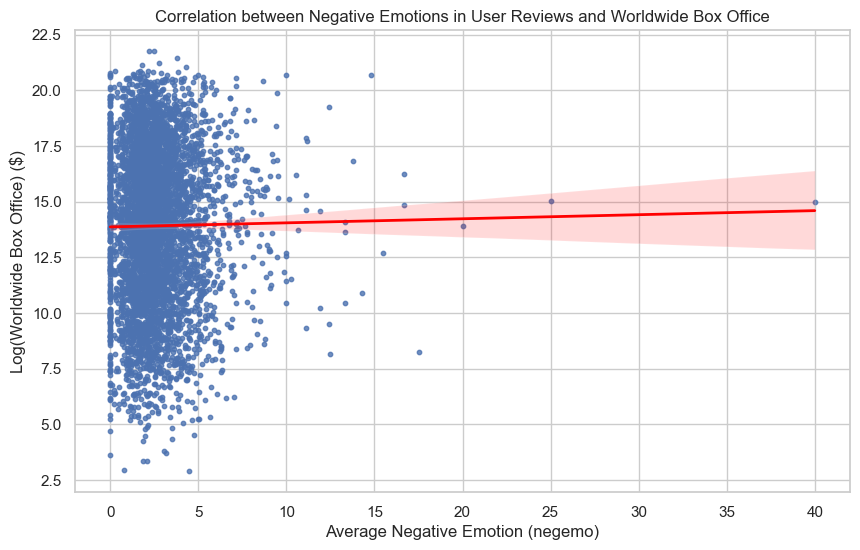

In [14]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def load_config():
    return {
        'dbname': 'postgres',
        'user': 'postgres',
        'password': 'Laiba786',
        'host': 'localhost',
        'port': '5432'
    }

def get_negemo_boxoffice_data():
    config = load_config()
    try:
        with psycopg2.connect(**config) as conn:
            with conn.cursor() as cur:
                query = """
                SELECT 
                    movie_table.movie_id,
                    movie_table.worldwideboxoffice,
                    AVG(user_reviews.negemo) AS avg_negemo
                FROM movie_table
                JOIN user_reviews ON movie_table.movie_id = user_reviews.movie_id
                WHERE user_reviews.negemo IS NOT NULL
                GROUP BY movie_table.movie_id;
                """
                cur.execute(query)
                
                rows = cur.fetchall()
                df_negemo_boxoffice = pd.DataFrame(rows, columns=['movie_id', 'worldwide_box_office', 'avg_negemo'])

                print("Data before handling missing values:")
                print(df_negemo_boxoffice.head())

                # Fill missing worldwide box office values with 0
                df_negemo_boxoffice['worldwide_box_office'] = df_negemo_boxoffice['worldwide_box_office'].fillna(0)

                print("Missing values after handling:")
                print(df_negemo_boxoffice.isna().sum())

                return df_negemo_boxoffice

    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        return None

def calculate_negemo_correlation(df_negemo_boxoffice):
    correlation = df_negemo_boxoffice['worldwide_box_office'].corr(df_negemo_box_office['avg_negemo'])
    print(f"Correlation between Average Negative Emotion (negemo) and Worldwide Box Office: {correlation}")
    return correlation

def plot_negemo_correlation(df_negemo_boxoffice):
    sns.set(style="whitegrid")
    
    # Log transformation to make box office values more comparable
    df_negemo_boxoffice['log_worldwide_box_office'] = np.log1p(df_negemo_boxoffice['worldwide_box_office'])

    plt.figure(figsize=(10, 6))
    sns.regplot(x='avg_negemo', y='log_worldwide_box_office', data=df_negemo_box_office, 
                scatter_kws={'s': 10}, line_kws={"color":"red", "lw": 2})  # Increased line width for visibility
    
    plt.title('Correlation between Negative Emotions in User Reviews and Worldwide Box Office')
    plt.xlabel('Average Negative Emotion (negemo)')
    plt.ylabel('Log(Worldwide Box Office) ($)')
    
    plt.show()

if __name__ == '__main__':
    df_negemo_boxoffice = get_negemo_boxoffice_data()
    if df_negemo_boxoffice is not None:
        print(df_negemo_boxoffice.head())
        
        # Remove rows with worldwide_box_office == 0 and create a copy
        df_filtered = df_negemo_boxoffice[df_negemo_boxoffice['worldwide_box_office'] > 0].copy()
        print(f"Filtered data count: {len(df_filtered)}")

        if not df_filtered.empty:
            # Calculate correlation after removing zero box office entries
            correlation = df_filtered['worldwide_box_office'].corr(df_filtered['avg_negemo'])
            print(f"Correlation between Average Negative Emotion (negemo) and Worldwide Box Office (non-zero): {correlation}")
            
            # Plot the correlation with regression line
            plot_negemo_correlation(df_filtered)
